In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define directories
train_dir = 'dataset/Kather_texture_2016_image_tiles_5000/train'
val_dir = 'dataset/Kather_texture_2016_image_tiles_5000/validation'
test_dir = 'dataset/Kather_texture_2016_image_tiles_5000/test'

In [3]:
# Define image parameters
image_size = (150, 150)
batch_size = 32
num_classes = 8

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    shuffle=True
)

Found 4000 images belonging to 8 classes.


In [12]:
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    shuffle=False
)

Found 496 images belonging to 8 classes.


In [13]:
# Evaluate the model
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    class_mode='categorical',  # For multiclass classification
    shuffle=False
)

Found 504 images belonging to 8 classes.


In [14]:
from utils import performance
from models import alexnet

In [16]:
import tensorflow as tf

In [17]:
alexnet = tf.keras.models.load_model('models/Alexnet_1.keras')

/Users/karthik/Desktop/UROP/Code/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [18]:
googlenet = tf.keras.models.load_model('models/Googlenet_1.keras')

In [19]:
import numpy as np

In [23]:
alexnet.predict(test_generator[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


array([[0.27259114, 0.10443082, 0.28862473, 0.18947624, 0.01228542,
        0.13131973, 0.00059303, 0.0006789 ]], dtype=float32)

In [24]:
test_generator[0][1]

array([[1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
googlenet.predict(test_generator[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


array([[9.9955124e-01, 2.5862912e-08, 4.9669965e-05, 2.3674429e-05,
        6.5835298e-10, 3.7528650e-04, 1.5093495e-09, 2.0614985e-09]],
      dtype=float32)

In [72]:
def max_of_max(data, model_list, names):
    pred_values = []
    max_values = []
    
    # Get predictions and maximum values for each model
    for model in model_list:
        softmax_output = model.predict(data)
        pred_values.append(softmax_output)
        max_values.append(np.max(softmax_output))
    
    # Find the index of the maximum value among all maximum values
    predicted_model_index = max_values.index(max(max_values))
    
    # Find the index of the maximum value in the predictions of the selected model
    predicted_value_index = np.argmax(pred_values[predicted_model_index])
    
    # Get the name of the predicted model
    predicted_model_name = names[predicted_model_index]
    
    # Return the predicted value and model name as a tuple
    return predicted_value_index, predicted_model_name


In [73]:
final = []
y_pred = []

In [74]:
for i in range(len(test_generator)):
    alexnetPred = alexnet.predict(test_generator[i][0])
    googlenetPred = googlenet.predict(test_generator[i][0])
    pred,name = max_of_max(test_generator[i][0],[alexnet,googlenet],["Alexnet","Googlenet"])
    y_pred.append(pred)
    ans = "True Value: " + str(np.argmax(test_generator[i][1])) + " Alexnet Value: " + str(np.argmax(alexnetPred)) + " Googlenet Value: " + str(np.argmax(googlenetPred))," Fusion Value: " + str(pred) + " Predicted Model Name: " + str(name)
    final.append(ans)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

In [75]:
for i in final:
    print(i)

('True Value: 0 Alexnet Value: 2 Googlenet Value: 0', ' Fusion Value: 0 Predicted Model Name: Googlenet')
('True Value: 0 Alexnet Value: 0 Googlenet Value: 0', ' Fusion Value: 0 Predicted Model Name: Googlenet')
('True Value: 0 Alexnet Value: 2 Googlenet Value: 0', ' Fusion Value: 0 Predicted Model Name: Googlenet')
('True Value: 0 Alexnet Value: 0 Googlenet Value: 0', ' Fusion Value: 0 Predicted Model Name: Googlenet')
('True Value: 0 Alexnet Value: 4 Googlenet Value: 0', ' Fusion Value: 0 Predicted Model Name: Googlenet')
('True Value: 0 Alexnet Value: 0 Googlenet Value: 0', ' Fusion Value: 0 Predicted Model Name: Googlenet')
('True Value: 0 Alexnet Value: 0 Googlenet Value: 0', ' Fusion Value: 0 Predicted Model Name: Googlenet')
('True Value: 0 Alexnet Value: 0 Googlenet Value: 0', ' Fusion Value: 0 Predicted Model Name: Googlenet')
('True Value: 0 Alexnet Value: 2 Googlenet Value: 0', ' Fusion Value: 0 Predicted Model Name: Googlenet')
('True Value: 0 Alexnet Value: 0 Googlenet Val

In [ ]:
def max_of_max(data, model_list, names):
    pred_values = []
    max_values = []

    # Get predictions and maximum values for each model
    for model in model_list:
        softmax_output = model.predict(data)
        pred_values.append(softmax_output)
        max_values.append(np.max(softmax_output))

    # Find the index of the maximum value among all maximum values
    predicted_model_index = max_values.index(max(max_values))

    # Find the index of the maximum value in the predictions of the selected model
    predicted_value_index = np.argmax(pred_values[predicted_model_index])

    # Get the name of the predicted model
    predicted_model_name = names[predicted_model_index]

    # Return the predicted value and model name as a tuple
    return predicted_value_index, predicted_model_name

In [37]:
data = test_generator[0][0]

In [44]:
print(data.shape)

(1, 150, 150, 3)


In [63]:
pred_values = []
max_values = []

In [64]:
model_list = [alexnet,googlenet]
names = ["Alexnet","Googlenet"]

In [65]:
for model in model_list:
    softmax_output = model.predict(data)
    print("Softmax Output: " + str(softmax_output))
    pred_values.append(softmax_output)
    print("Predicted Values : ",pred_values)
    max_values.append(np.max(softmax_output))
    print("Max Values Array",max_values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Softmax Output: [[0.27259114 0.10443082 0.28862473 0.18947624 0.01228542 0.13131973
  0.00059303 0.0006789 ]]
Predicted Values :  [array([[0.27259114, 0.10443082, 0.28862473, 0.18947624, 0.01228542,
        0.13131973, 0.00059303, 0.0006789 ]], dtype=float32)]
Max Values Array [0.28862473]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Softmax Output: [[9.9955124e-01 2.5862912e-08 4.9669965e-05 2.3674429e-05 6.5835298e-10
  3.7528650e-04 1.5093495e-09 2.0614985e-09]]
Predicted Values :  [array([[0.27259114, 0.10443082, 0.28862473, 0.18947624, 0.01228542,
        0.13131973, 0.00059303, 0.0006789 ]], dtype=float32), array([[9.9955124e-01, 2.5862912e-08, 4.9669965e-05, 2.3674429e-05,
        6.5835298e-10, 3.7528650e-04, 1.5093495e-09, 2.0614985e-09]],
      dtype=float32)]
Max Values Array [0.28862473, 0.99955124]


In [66]:
# Find the index of the maximum value among all maximum values
predicted_model_index = max_values.index(min(max_values))
names[predicted_model_index]

'Alexnet'

In [67]:
pred_values[predicted_model_index]

array([[0.27259114, 0.10443082, 0.28862473, 0.18947624, 0.01228542,
        0.13131973, 0.00059303, 0.0006789 ]], dtype=float32)

In [68]:
# Find the index of the maximum value in the predictions of the selected model
predicted_value_index = np.argmin(pred_values[predicted_model_index])

In [69]:
predicted_value_index

6

Accuracy: 0.8591269841269841


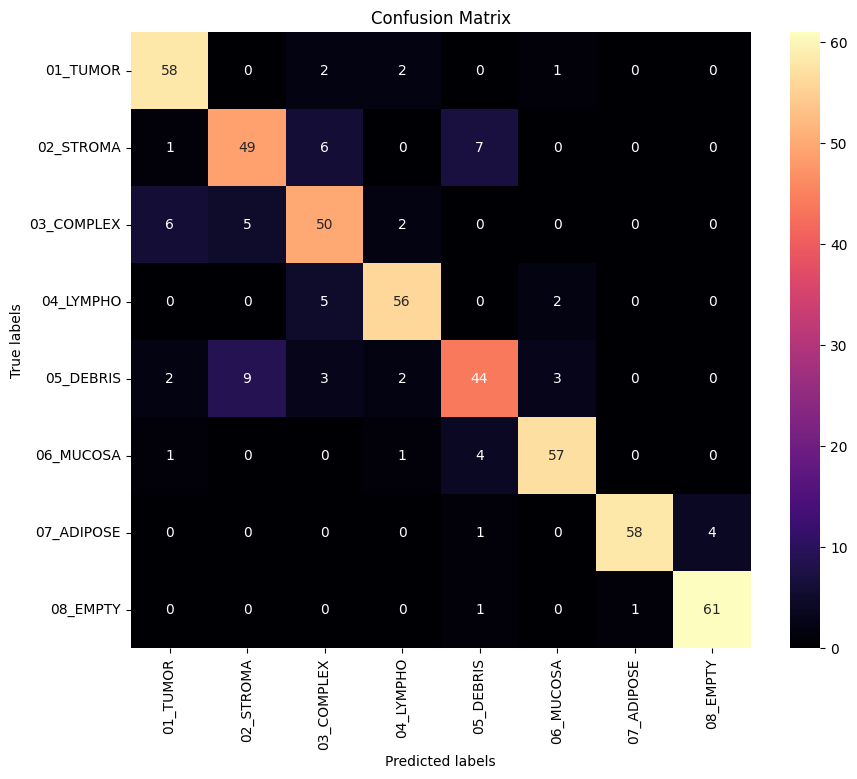

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_true = test_generator.classes
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualize confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='magma', xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()